<a href="https://colab.research.google.com/github/skandanyal/ML_Lab_2025_2026/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Recognition and Classification

ML lab on 31-10-2025     
By: Skandan C.Y

## Data Loading an Overview

Understand shape, labels and pixel distribution, visualize random samples.

In [ ]:
# loading MNIST dataset from sklearn

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

In [ ]:
# Shape of the dataset and unique elements

import numpy as np

print(f"Dataset shape: {X.shape}")
print(f"Labels range: {np.unique(y)}")

Dataset shape: (70000, 784)
Labels range: [0 1 2 3 4 5 6 7 8 9]


## Data Preprocessing

Normalize pixel values, split into train, validation and test datasets

In [ ]:
import pandas as pd

X = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_744,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Normalizing the  dataset

X = X/255.0

In [ ]:
# splitting into training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=5
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.75, random_state=5
)

print(f"Size of training dataset:{len(X_train)}")
print(f"Size of validation dataset:{len(X_val)}")
print(f"Size of testing dataset:{len(X_test)}")

Size of training dataset:42000
Size of validation dataset:14000
Size of testing dataset:14000


## Train a Machine Learning model
Evaluate accuracy, confusion matrix, etc.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Define parameter grid to explore
C_values = [0.1, 1, 10]          # Regularization strengths
solvers = ['lbfgs', 'saga']            # Suitable solvers for large datasets
penalties = ['l2']                    # 'l1' also possible with saga, but slower

results = []

# Loop over all parameter combinations
for C in C_values:
    for solver in solvers:
        for penalty in penalties:
            print(f"Training LogisticRegression(C={C}, solver='{solver}', penalty='{penalty}')")
            try:
                # Train model
                model = LogisticRegression(
                    C=C,
                    solver=solver,
                    penalty=penalty,
                    max_iter=200,
                    n_jobs=-1
                )
                model.fit(X_train, y_train)

                # Evaluate on validation set
                y_pred = model.predict(X_val)
                acc = accuracy_score(y_val, y_pred)
                results.append((C, solver, penalty, acc))
                print(f"Validation Accuracy: {acc:.4f}\n")

            except Exception as e:
                print(f"Skipped combination (C={C}, solver={solver}, penalty={penalty}): {e}\n")

# Convert results to sorted DataFrame
import pandas as pd
results_df = pd.DataFrame(results, columns=['C', 'solver', 'penalty', 'val_accuracy'])
print("\n=== Results Summary ===")
print(results_df.sort_values(by='val_accuracy', ascending=False))

Training LogisticRegression(C=0.1, solver='lbfgs', penalty='l2')
Validation Accuracy: 0.9219

Training LogisticRegression(C=0.1, solver='saga', penalty='l2')
Validation Accuracy: 0.9222

Training LogisticRegression(C=1, solver='lbfgs', penalty='l2')
Validation Accuracy: 0.9211

Training LogisticRegression(C=1, solver='saga', penalty='l2')


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy: 0.9214

Training LogisticRegression(C=10, solver='lbfgs', penalty='l2')
Validation Accuracy: 0.9177

Training LogisticRegression(C=10, solver='saga', penalty='l2')
Validation Accuracy: 0.9190


=== Results Summary ===
      C solver penalty  val_accuracy
1   0.1   saga      l2      0.922214
0   0.1  lbfgs      l2      0.921929
3   1.0   saga      l2      0.921429
2   1.0  lbfgs      l2      0.921071
5  10.0   saga      l2      0.919000
4  10.0  lbfgs      l2      0.917714


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
best = results_df.sort_values(by='val_accuracy', ascending=False).iloc[0]
print(f"Best config: C={best.C}, solver='{best.solver}', penalty='{best.penalty}' (acc={best.val_accuracy:.4f})")

Best config: C=0.1, solver='saga', penalty='l2' (acc=0.9222)


In [ ]:
best_model = LogisticRegression(
    C=best.C,
    solver=best.solver,
    penalty=best.penalty,
    max_iter=200,
    n_jobs=-1
)

best_model.fit(X_train, y_train)

LogisticRegression(C=np.float64(0.1), max_iter=200, n_jobs=-1, solver='saga')

In [ ]:
y_pred_test = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix

test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9241


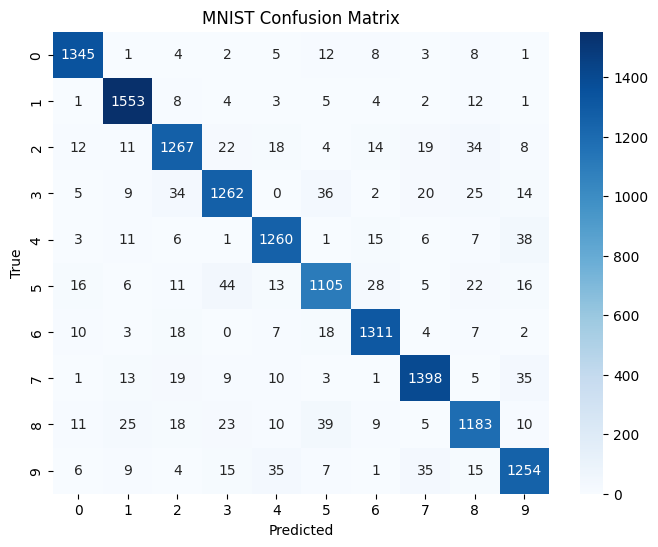

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("MNIST Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
y_pred_test = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix

test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9241


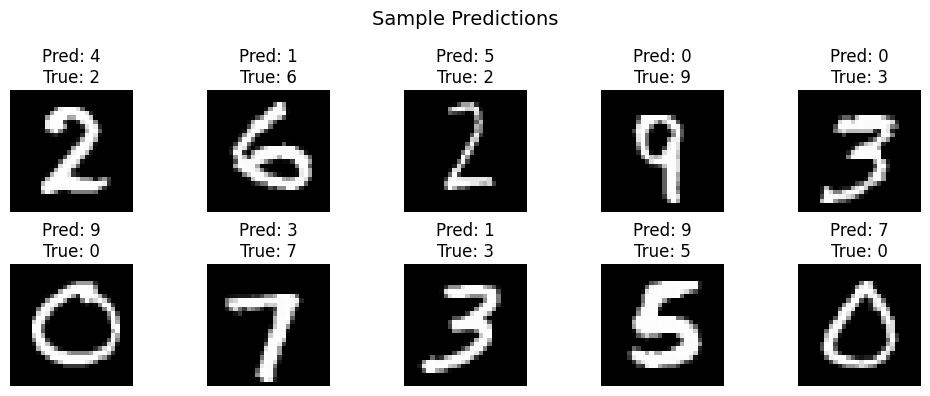

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions", fontsize=14)
plt.tight_layout()
plt.show()

